In [4]:
%reload_ext autoreload
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns


import math




from __future__ import division
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load  data set.

In [5]:
df = pd.read_csv('data.csv')

df.shape

(342630, 4)

In [6]:
df_example = df.copy()

In [7]:

df_example.head(5)


,timestamp,xprice,yprice,returns
0,1357225500000,139.8375,169.2500,0.3125
1,1357225510000,139.8875,169.3000,0.2750
2,1357225520000,139.8625,169.3375,0.2500
3,1357225530000,139.8375,169.3625,0.2375
4,1357225540000,139.8375,169.3625,0.3250


In [8]:

df_example['ewm_10'] = df_example['xprice'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
df_example['ewm_20'] = df_example['xprice'].ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()
df_example['ewm_30'] = df_example['xprice'].ewm(span=30,min_periods=0,adjust=False,ignore_na=False).mean()
df_example['ewm_60'] = df_example['xprice'].ewm(span=60,min_periods=0,adjust=False,ignore_na=False).mean()
df_example['ewm_90'] = df_example['xprice'].ewm(span=90,min_periods=0,adjust=False,ignore_na=False).mean()
df_example['ewm_120'] = df_example['xprice'].ewm(span=120,min_periods=0,adjust=False,ignore_na=False).mean()
df_example['ewm_500'] = df_example['xprice'].ewm(span=500,min_periods=0,adjust=False,ignore_na=False).mean()
df_example['ewm_1000'] = df_example['xprice'].ewm(span=1000,min_periods=0,adjust=False,ignore_na=False).mean()
df_example['ewm_3600'] = df_example['xprice'].ewm(span=3600,min_periods=0,adjust=False,ignore_na=False).mean()


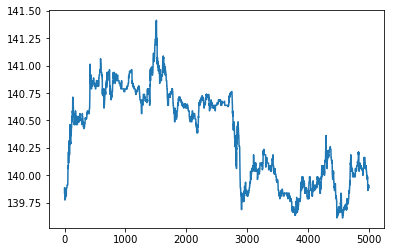

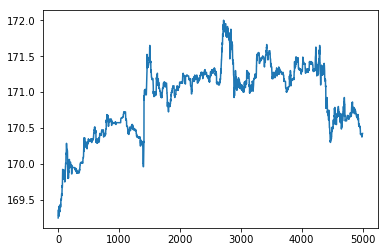

In [9]:
plt.plot(df_example['xprice'][0:5000])
plt.show()
plt.plot(df_example['yprice'][0:5000])

# plt.plot(df_example['ewm_10'][0:5000])
# plt.plot(df_example['ewm_20'][0:5000])
# plt.plot(df_example['ewm_30'][0:5000])
# plt.plot(df_example['ewm_60'][0:5000])
# plt.plot(df_example['ewm_90'][0:5000])
# plt.plot(df_example['ewm_120'][0:5000])


plt.show()

In [10]:
N_tot = df.shape[0]
# Use data after 300000 to evaluate the model
N_eval = 300000

#Split the first 300000 data into training and testing
N_train = 200000

In [11]:
df_eval = df.iloc[N_eval:]
df_eval.shape

(42630, 4)

In [12]:
df_data = df.iloc[:N_eval]


In [13]:
ret = df['returns'].iloc[:N_eval]

In [14]:
del df_data['returns']
del df_data['timestamp']



# Feature Enginnering

In [56]:

ema_span_list = list(np.ceil([2**i for i in range(9)])[2:])
# ema_span_list = np.square(np.ceil(np.linspace(2, np.sqrt(4500), 10)))
print(ema_span_list)

long_short_list = [1/(2)**i for i in range(4)]
print(long_short_list)

[4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0]
[1.0, 0.5, 0.25, 0.125]


In [57]:
Direction = 0
ratio = []
for ii in range(Direction):
    value = -3 + 3/Direction * ii 
    ratio.append([1, value])
ratio = np.array(ratio)
print(ratio)

[]


In [58]:

for ii in range(Direction):
    new_column3 = 'z' + str(ii) + 'price'
    df_data[new_column3] = ratio[ii, 0] * df_data['xprice'] + ratio[ii, 1] * df_data['yprice']
    

In [59]:
df_orig = df_data.copy()


In [ ]:
df_orig.shape

(300000, 262)

In [ ]:
for price in df_orig.columns:
    stock = price[:2]
    
    for ema_span in ema_span_list:
        ema_price = stock + '_price_ema_' + str(ema_span)
        df_data[ema_price] = df_data[price].ewm(span=ema_span,min_periods=0,adjust=False,ignore_na=False).mean()


        vol_short = stock + '_vol_short_' + str(ema_span)
        df_data[vol_short] = np.square(df_data[price] - df_data[ema_price])
        
        abs_short = stock + '_abs_short_' + str(ema_span)
        df_data[abs_short] = np.abs(df_data[price] - df_data[ema_price])
        
        del_short = stock + '_del_short_' + str(ema_span)
        df_data[del_short] = df_data[price] - df_data[ema_price]

        for rate in long_short_list:
            average = np.ceil(ema_span * rate)
            
            vol_long = stock + '_vol_long_' + str(ema_span) + '_' + str(average)
            df_data[vol_long] = df_data[vol_short].ewm(span=average, min_periods=0,adjust=False,ignore_na=False).mean()

            abs_long = stock + '_abs_long_' + str(ema_span) + '_' + str(average)
            df_data[abs_long] = df_data[abs_short].ewm(span=average, min_periods=0,adjust=False,ignore_na=False).mean()

            del_long = stock + '_del_long_' + str(ema_span) + '_' + str(average)
            df_data[del_long] = df_data[del_short].ewm(span=average, min_periods=0,adjust=False,ignore_na=False).mean()            
    

C:\Users\liuli\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\liuli\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\liuli\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [ ]:
df_data.columns

In [ ]:
df_data.shape

In [ ]:
# frame = [i for i in range(0, 20000)]

# plt.plot(df_data['xprice'][frame])
# plt.plot(df_data['xp_price_ema_729.0'][frame])

# plt.show()



In [ ]:
# plt.plot(df_data['xp_vol_long_729.0_1458.0'][frame])
# plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_data)
df_data_arr = scaler.transform(df_data)

In [ ]:
# df_data_arr = np.array(df_data)

In [ ]:
df_data.head()

# Training and Testing

In [ ]:
ret_train = ret.iloc[:N_train]
ret_test = ret.iloc[N_train: N_eval]
print(ret_train.shape)
print(ret_test.shape)


In [ ]:
df_train = df_data_arr[:N_train, :]
print(df_train.shape)
df_test = df_data_arr[N_train: N_eval, :]
print(df_test.shape)

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression



target = ret_train.values
beta = LinearRegression().fit(df_train, target)


olsmod = sm.OLS(target, df_train)
beta2 = olsmod.fit()

y_pred_LR = beta.predict(df_test)
y_pred_sm = beta2.predict(df_test)


C:\Users\liuli\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
import sklearn.metrics as metrics
from scipy import stats


In [32]:
print('R2 in Training')
print(metrics.r2_score(target, beta.predict(df_train)))
print(beta2.rsquared)

print('MSE in Training')
print(metrics.mean_squared_error(target, beta2.predict(df_train)))


R2 in Training
0.0408236030139
0.0403045704449
MSE in Training
0.0346070940384


In [33]:

print(np.square(ret_test.values).mean())

print(metrics.mean_squared_error(ret_test, y_pred_LR))
print(metrics.mean_squared_error(ret_test, y_pred_sm))
# print(np.sqrt(metrics.mean_squared_error(ret_test, y_pred_GB)))



0.019552990625
0.0219343613366
0.0214435832413


In [ ]:
Ntr, d = df_train.shape
Nte, d = df_test.shape

xtrain = np.ones([Ntr,d + 1])
xtest = np.ones([Nte,d + 1])

xtrain[:,:-1] = df_train
xtest[:,:-1] = df_test

In [ ]:
x = xtrain
y = target
xTrans = x.transpose()

N, d = xtrain.shape


step_size = 2e-3
epsilon = .1/d

alpha_list = [1e-8*np.sqrt(d/N) * 10**i for i in range(2)]


error = {}
theta_list = {}

for alpha in alpha_list:
    
    theta = np.zeros(d)
    gradient = np.zeros(d)
    valid_old = np.inf
    
    for i in range(51):
        loss = np.dot(x, theta) - y         
        
#         gradient = np.dot(xTrans, loss) / N    
        
        gradient = stats.trim_mean(np.multiply(xTrans, loss), epsilon, axis=1)

        theta = theta - step_size * gradient - alpha * theta
        
        cost = np.square(loss).mean() 
        valid = metrics.mean_squared_error(ret_test, np.dot(xtest, theta))

        if i > 3 and valid > valid_old:
            print('overfitting!')
            break

        error[(alpha, i)] = valid
        
        valid_old = valid
        theta_list[(alpha, i)] = theta
        print("alpha = %f | Cost: %f | Valid: %f" % (alpha, cost, valid))
     
    '0.0195047945644'       

In [ ]:
best = min(error, key=error.get)


print(best)
print(error[best])

In [38]:
model = theta_list[best]    
# model = theta

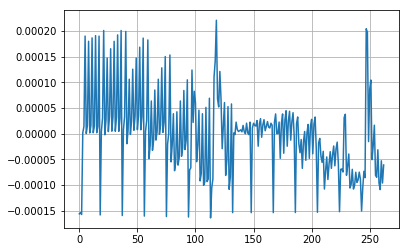

In [39]:
plt.plot(model)
plt.grid()


In [40]:
feature_importance = sorted(range(len(model)), key = lambda k:model[k])

In [41]:
# print(index[::-1])

In [42]:
for ii in range(0, 20):
    print(df_data.columns[feature_importance[::-1][ii]])

xp_abs_long_256.0_512.0
yp_vol_long_256.0_512.0
xp_del_long_8.0_1.0
xp_del_short_8.0
xp_del_short_16.0
yp_abs_long_256.0_512.0
xp_del_long_8.0_2.0
xp_del_long_4.0_2.0
xp_del_long_4.0_1.0
xp_del_short_4.0
xp_del_long_4.0_4.0
xp_del_long_16.0_2.0
xp_del_short_32.0
xp_del_long_4.0_8.0
xp_del_long_8.0_4.0
xp_del_long_16.0_4.0
xp_del_long_8.0_8.0
xp_del_short_64.0
xp_del_long_32.0_4.0
xp_del_long_16.0_8.0


In [49]:

y_test_RGD = np.dot(xtest, model)

In [50]:
print(np.square(ret_test.values).mean())

print(metrics.mean_squared_error(ret_test, y_test_RGD))


0.019552990625
0.0195220806514


In [51]:
print(metrics.r2_score(target, np.dot(xtrain, model)))

print(metrics.r2_score(ret_test, y_test_RGD))


0.00379020435181
0.00136362249298


In [52]:
print(np.corrcoef(target, np.dot(xtrain, model)))

print(np.corrcoef(ret_test, y_test_RGD))


[[ 1.          0.08844279]
 [ 0.08844279  1.        ]]
[[ 1.          0.03953038]
 [ 0.03953038  1.        ]]


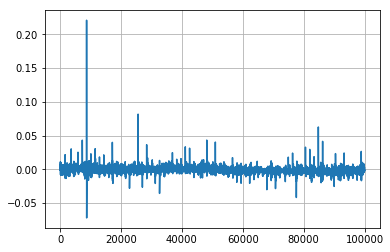

In [53]:
# plt.plot(ret_test.values[2000: 5000])
plt.plot(y_test_RGD[:])
# plt.plot(y_pred_ridge[:])

plt.grid()

plt.show()

In [54]:
df_train.shape

(200000, 262)

# Save the model

In [55]:
import pickle

def save_obj(obj, name ):
    with open('./'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

save_obj(theta, 'MODEL_220_Ridge_Trim')

In [ ]:
from sklearn.linear_model import Ridge

print(alpha_list)

In [ ]:

for alpha_number in alpha_list:
    ridge = Ridge(fit_intercept=True, alpha= alpha_number, random_state=42)
    ridge.fit(df_train, target)
#     coef_ridge = ridge.coef_
    
    y_pred_ridge = ridge.predict(df_test)
    print(alpha_number, metrics.mean_squared_error(ret_test, y_pred_ridge))


In [ ]:
from sklearn.linear_model import HuberRegressor, Ridge


In [ ]:
beta_list = alpha_list


In [ ]:


for beta_number in beta_list:
    huber = HuberRegressor(fit_intercept=True, alpha = beta_number, max_iter=100, epsilon = 1.0)
    huber.fit(df_train, target)
    
    y_pred_huber = huber.predict(df_test)
    print(beta_number, metrics.mean_squared_error(ret_test, y_pred_huber))






In [ ]:
from sklearn import linear_model, datasets

ransac = linear_model.RANSACRegressor()
ransac.fit(df_train, target)
y_pred_ransac = ransac.predict(df_test)



In [ ]:
print(metrics.mean_squared_error(ret_test, y_pred_ransac))


## Ridge CV

In [ ]:
# from sklearn.linear_model import RidgeCV

# clf = RidgeCV(alphas=[1e-6, 3e-6, 6e-6, 1e-5, 3e-5], store_cv_values=True, fit_intercept=True).fit(df_train, target)

In [ ]:
# y_pred_ridge_2 = clf.predict(df_test)


# GBDT

In [ ]:
y_pred_ridge_thresh = y_pred_ridge.copy()
y_pred_huber_thresh = y_pred_huber.copy()

In [ ]:
lower_thresh = 0.02
upper_thresh = 0.1


plt.plot(y_pred_huber)

In [ ]:
lower_threshold_indices = (np.abs(y_pred_ridge) < lower_thresh)
upper_threshold_indices = (np.abs(y_pred_ridge) > upper_thresh)

y_pred_ridge_thresh[upper_threshold_indices] = 0
y_pred_ridge_thresh[lower_threshold_indices] = 0

In [ ]:
lower_threshold_indices = (np.abs(y_pred_huber) < lower_thresh)
upper_threshold_indices = (np.abs(y_pred_huber) > upper_thresh)

y_pred_huber_thresh[upper_threshold_indices] = 0
y_pred_huber_thresh[lower_threshold_indices] = 0

In [ ]:


print(metrics.r2_score(ret_test, y_pred_ridge))
print(metrics.r2_score(ret_test, y_pred_sm))

In [ ]:
print(np.square(ret_test.values).mean())

print(metrics.mean_squared_error(ret_test, y_pred_ridge))
print(metrics.mean_squared_error(ret_test, y_pred_sm))
# print(np.sqrt(metrics.mean_squared_error(ret_test, y_pred_GB)))


In [ ]:
plt.plot(y_pred_ridge)

In [ ]:
plt.plot(ret_test.values[:1000])
plt.plot(y_pred_ridge[:1000])
plt.show()


In [ ]:
ret_test_sign = np.array(ret_test>0)

In [ ]:
np.sum((y_pred_ridge > 0) == ret_test_sign)/len(ret_test_sign)


# Offline Evaluation